In [1]:
import pandas as pd
import numpy as np

In [9]:
!pip install plotnine

You should consider upgrading via the 'c:\users\rkdwn\appdata\local\programs\python\python36\python.exe -m pip install --upgrade pip' command.



  Using cached plotnine-0.8.0-py3-none-any.whl (4.7 MB)
  Using cached descartes-1.1.0-py3-none-any.whl (5.8 kB)
  Using cached statsmodels-0.12.2-cp36-none-win_amd64.whl (9.3 MB)
  Using cached patsy-0.5.1-py2.py3-none-any.whl (231 kB)
  Using cached mizani-0.7.3-py3-none-any.whl (63 kB)
  Using cached palettable-3.3.0-py2.py3-none-any.whl (111 kB)


In [11]:
!pip install sklearn

  Using cached sklearn-0.0.tar.gz (1.1 kB)
  Using cached joblib-1.0.1-py3-none-any.whl (303 kB)
  Using cached threadpoolctl-2.2.0-py3-none-any.whl (12 kB)
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1309 sha256=0454ab83a58854d446a82083b75ca4453a0ffd39e60b92e4a82389f3c8216af8
  Stored in directory: c:\users\rkdwn\appdata\local\pip\cache\wheels\23\9d\42\5ec745cbbb17517000a53cecc49d6a865450d1f5cb16dc8a9c
Successfully built sklearn


You should consider upgrading via the 'c:\users\rkdwn\appdata\local\programs\python\python36\python.exe -m pip install --upgrade pip' command.


In [12]:
#import warnings
#warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from plotnine import * 

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

from sklearn.cluster import DBSCAN

from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

%matplotlib inline

In [161]:
X=[0.9307736754417419, -0.2413116991519928, -0.06067265570163727, -0.06205157935619354, 0.0, -0.45366597175598145, -0.46331846714019775, -0.608105480670929, 1.5195742845535278, 1.5457738637924194, 1.6547088623046875, 1.598172903060913, 0.9307736754417419, -0.2413116991519928, -0.2564798593521118, -0.06067265570163727, -0.06205157935619354, 0.0, -0.45366597175598145, -0.46331846714019775, -0.608105480670929, 1.4395966529846191, 1.5457738637924194, 1.6547088623046875, 1.598172903060913, 0.9307736754417419, -0.2413116991519928, -0.06067265570163727, -0.06205157935619354, 0.0, -0.45366597175598145, -0.46331846714019775, -0.608105480670929, 1.5195742845535278, 1.5457738637924194, 1.6547088623046875, 1.682287335395813]
Y=[0.5877014994621277, 1.0616645812988281, 1.8880764245986938, 1.9351123571395874, 2.0070300102233887, 1.965131163597107, 2.0424928665161133, 2.07206392288208, 2.005849838256836, 2.076902389526367, 2.0318355560302734, 2.0612945556640625, 0.5913264155387878, 1.0670735836029053, 1.342735767364502, 1.8725913763046265, 1.919451355934143, 1.9961528778076172, 1.9463293552398682, 2.0297510623931885, 2.074535846710205, 2.050813674926758, 2.0630650520324707, 2.015209674835205, 2.034764051437378, 0.5809137225151062, 1.0551626682281494, 1.9015865325927734, 1.9486018419265747, 2.0155766010284424, 1.9810117483139038, 2.0523335933685303, 2.0670905113220215, 2.0231919288635254, 2.086787700653076, 2.0447356700897217, 2.02055287361145]


In [162]:
names_dic = {'x':X, 'y': Y}
d1 = pd.DataFrame(names_dic)

In [163]:
d1.head()

,x,y
0,0.930774,0.587701
1,-0.241312,1.061665
2,-0.060673,1.888076
3,-0.062052,1.935112
4,0.000000,2.007030


In [164]:
z=StandardScaler()

In [165]:
d1[["x","y"]]=z.fit_transform(d1[["x","y"]])

In [166]:
d1[["x", "y"]]

,x,y
0,0.573393,-2.659221
1,-0.762697,-1.617627
2,-0.556782,0.198519
3,-0.558354,0.301886
4,-0.487620,0.459934
5,-1.004765,0.367856
6,-1.015768,0.537868
7,-1.180814,0.602855
8,1.244581,0.457341
9,1.274447,0.613488


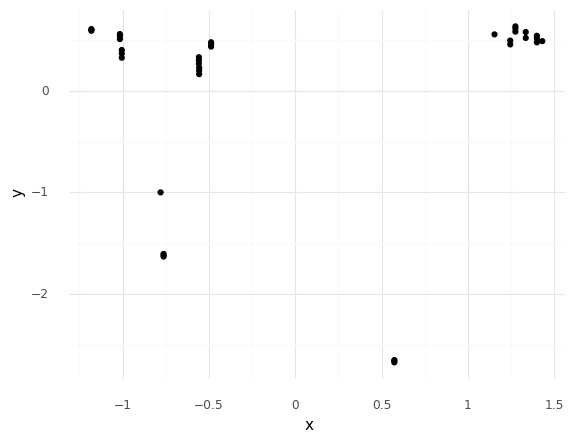

<ggplot: (96023884790)>

In [167]:
ggplot(d1,aes(x="x",y="y"))+geom_point()+theme_minimal()

In [168]:
db1=DBSCAN(eps=0.5,min_samples=5).fit(d1)

In [169]:
labsList=["Noise"]
labsList=labsList+["Cluster"+str(i) for i in range(1,len(set(db1.labels_)))]

# 추가할 열 (현재는 array인 상태)

In [170]:
db1.labels_

array([-1, -1,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1, -1, -1, -1,  0,  0,
        0,  0,  0,  0,  1,  1,  1,  1, -1, -1,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1], dtype=int64)

In [171]:
classid = pd.DataFrame(db1.labels_, columns = ['id'])

In [134]:
classid+1

,id
0,0
1,0
2,1
3,1
4,1
5,1
6,1
7,1
8,2
9,2


# 데이터 프레임 병합

In [172]:
final=d1.join(classid)
final

,x,y,id
0,0.573393,-2.659221,-1
1,-0.762697,-1.617627,-1
2,-0.556782,0.198519,0
3,-0.558354,0.301886,0
4,-0.487620,0.459934,0
5,-1.004765,0.367856,0
6,-1.015768,0.537868,0
7,-1.180814,0.602855,0
8,1.244581,0.457341,1
9,1.274447,0.613488,1


In [173]:
final['id']+1

0     0
1     0
2     1
3     1
4     1
5     1
6     1
7     1
8     2
9     2
10    2
11    2
12    0
13    0
14    0
15    1
16    1
17    1
18    1
19    1
20    1
21    2
22    2
23    2
24    2
25    0
26    0
27    1
28    1
29    1
30    1
31    1
32    1
33    2
34    2
35    2
36    2
Name: id, dtype: int64

In [156]:
final['id']

0    -1
1    -1
2     0
3     0
4     0
5     0
6     0
7     0
8     1
9     1
10    1
11    1
12   -1
13   -1
14   -1
15    0
16    0
17    0
18    0
19    0
20    0
21    1
22    1
23    1
24    1
25   -1
26   -1
27    0
28    0
29    0
30    0
31    0
32    0
33    1
34    1
35    1
36    1
Name: id, dtype: int64

In [174]:
grouped=final.groupby(final['id']).mean()

# 전체 데이터 객체 개수 출력 (향후 for문에 활용하기 위함)

In [175]:
print(grouped.loc[0])
print(grouped.loc[1])
print(grouped.loc[-1])

x   -0.800684
y    0.409679
Name: 0, dtype: float64
x    1.313351
y    0.538800
Name: 1, dtype: float64
x   -0.192557
y   -1.977119
Name: -1, dtype: float64


In [189]:
if -1 in db1.labels_:
     for j in range(0, len(grouped)-1):
            print(j, "번째 객체 평균 좌표 : ")
            print(grouped.loc[j])
else:
     for j in range(0, len(grouped)):
            print(j, "번째 객체 평균 좌표 : ")
            print(grouped.loc[j])

0 번째 객체 평균 좌표 : 
x   -0.800684
y    0.409679
Name: 0, dtype: float64
1 번째 객체 평균 좌표 : 
x    1.313351
y    0.538800
Name: 1, dtype: float64


In [188]:
a=0

if -1 in db1.labels_:
    a=-1
    
            
print(a)

-1


In [ ]:
if grouped.loc[-1]:
    grouped['id']+1

In [ ]:
grouped

In [115]:
for j in range(len(grouped)):
    print(j,"번째 객체 평균 좌표 :")
    print(grouped.loc[j])

0 번째 객체 평균 좌표 :
x   -0.753443
y    0.143651
Name: 0, dtype: float64
1 번째 객체 평균 좌표 :
x    1.281719
y    0.353182
Name: 1, dtype: float64
2 번째 객체 평균 좌표 :


KeyError: 2

In [101]:
print(len(grouped))

3


# 첫번째 객체의 평균 좌표 출력

In [102]:
print(grouped.loc[0])

x   -0.753443
y    0.143651
Name: 0, dtype: float64


In [103]:
d1["assignments"]=db1.labels_

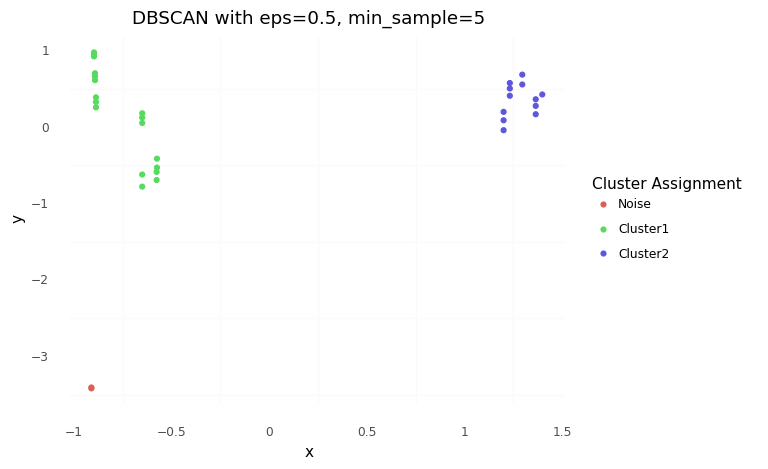

<ggplot: (-9223371940831087570)>

In [104]:
(ggplot(d1,aes(x="x",y="y",color="factor(assignments)"))+geom_point()+theme_minimal()+scale_color_discrete(name="Cluster Assignment",labels=labsList)+theme(panel_grid_major=element_blank())+labs(title="DBSCAN with eps=0.5, min_sample=5"))

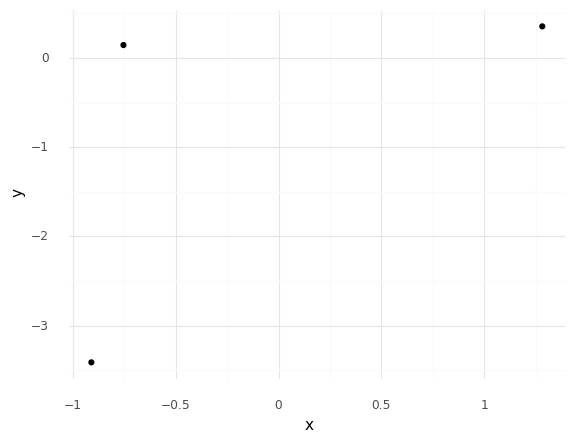

<ggplot: (-9223371940831072091)>

In [105]:

ggplot(grouped,aes(x="x",y="y"))+geom_point()+theme_minimal()